In [1]:
!python -m pip install paddlepaddle-gpu==2.4.0.post112 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!pip install "paddleocr>=2.0.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     |████████████████████████████████| 547.9 MB 17 kB/s 
     |████████████████████████████████| 394 kB 15.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411 kB 15.3 MB/s 
     |████████████████████████████████| 8.8 MB 62.9 MB/s 
     |████████████████████████████████| 148 kB 57.8 MB/s 
     |████████████████████████████████| 5.6 MB 53.9 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 604 kB 64.7 MB/s 
     |████████████████████████████████| 4.9 MB 56.0 MB/s 
     |████████████████████████████████| 2.2 MB 55.8 MB/s 
     |████████████████████████████████| 965 kB 66.4 MB/s 
     |████████████████████████████████| 399 kB 62.7 MB/s 
     |██████████████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ANPR_system

/content/drive/MyDrive/ANPR_system


In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
!nvidia-smi

Mon Nov 28 04:23:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from paddleocr import PaddleOCR
ocr = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:10<00:00, 371kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:18<00:00, 530kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:12<00:00, 170kiB/s]

[2022/11/28 04:24:22] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [7]:
res = ocr.ocr('Test/IMG20211207080504.jpeg')

[2022/11/28 04:24:28] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/28 04:24:33] ppocr DEBUG: dt_boxes num : 7, elapse : 4.7912678718566895


OSError: ignored

In [ ]:
res[0][0][0]

In [ ]:
import cv2
import time
import re
import numpy as np
import matplotlib.pyplot as plt

OCR_TH = 0.2
 
# Text parameters.
FONT_FACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1
 
# Colors.
BLACK  = (0,0,0)
BLUE   = (255,178,50)
YELLOW = (0,255,255)

In [ ]:
%matplotlib inline

In [ ]:
def detectx (frame, model):
    frame = [frame]
    print(f"[INFO] Detecting. . . ")
    results = model(frame)
    # results.show()
    # print( results.xyxyn[0])
    # print(results.xyxyn[0][:, -1])
    # print(results.xyxyn[0][:, :-1])

    labels, cordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    return labels, cordinates

In [ ]:
def clean(img):
    img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
    img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    return img

In [ ]:
def draw_label(im, label, x, y):
    """Draw text onto image at location."""
    # Get text size.
    text_size = cv2.getTextSize(label, FONT_FACE, FONT_SCALE, THICKNESS)
    dim, baseline = text_size[0], text_size[1]
    # Use text size to create a BLACK rectangle.
    cv2.rectangle(im, (x,y- dim[1] - baseline), (x + dim[0], y), (0,0,0), cv2.FILLED);
    # Display text inside the rectangle.
    cv2.putText(im, label, (x, y -baseline), FONT_FACE, FONT_SCALE, (0,255,0), THICKNESS, cv2.LINE_AA)

In [ ]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result[0]:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
          plate.append(result[1][0])

    plate = ''.join(plate)
    plate = re.sub(r'\W+', '', plate)
    return plate.upper()

In [ ]:

# function to recognize license plate numbers using Tesseract OCR
def recognize_plate_easyocr(img, coords,reader,region_threshold):
    # separate coordinates from box
    xmin, ymin, xmax, ymax = coords
    # get the subimage that makes up the bounded region and take an additional 5 pixels on each side
    # nplate = img[int(ymin)-5:int(ymax)+5, int(xmin)-5:int(xmax)+5]
    nplate = img[int(ymin):int(ymax), int(xmin):int(xmax)] ### cropping the number plate from the whole image
    nplate = clean(nplate)

    ocr_result = ocr.ocr(nplate)

    text = filter_text(region=nplate, ocr_result=ocr_result, region_threshold= region_threshold)

    if len(text) ==1:
        text = text[0].upper()
    return text

In [ ]:
def plot_boxes(results, frame,classes):

    """
    --> This function takes results, frame and classes
    --> results: contains labels and coordinates predicted by model on the given frame
    --> classes: contains the strting labels

    """
    labels, cord = results
    n = len(labels)
    x_shape, y_shape = frame.shape[1], frame.shape[0]

    print(f"[INFO] Total {n} detections. . . ")
    print(f"[INFO] Looping through all detections. . . ")


    ### looping through the detections
    for i in range(n):
        row = cord[i]
        if row[4] >= 0.55: ### threshold value for detection. We are discarding everything below this value
            print(f"[INFO] Extracting BBox coordinates. . . ")
            x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape) ## BBOx coordniates
            text_d = classes[int(labels[i])]
            # cv2.imwrite("./output/dp.jpg",frame[int(y1):int(y2), int(x1):int(x2)])

            coords = [x1,y1,x2,y2]

            plate_num = recognize_plate_easyocr(img = frame, coords= coords, reader= ocr, region_threshold= OCR_TH)

            # if text_d == 'mask':
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) ## BBox
            draw_label(frame, f"{plate_num}", x1, y1)
            print(f"License Plate Number {plate_num}")

    return frame

In [ ]:
print(f"[INFO] Loading model... ")
## loading the custom trained model
# model =  torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt',force_reload=True) ## if you want to download the git repo and then run the detection
model =  torch.hub.load('./yolov5', 'custom', source ='local', path='/content/drive/MyDrive/ANPR_system/yolov5/runs/train/exp/weights/best.pt',force_reload=True) ### The repo is stored locally

classes = model.names ### class names in string format

[INFO] Loading model... 


INFO:yolov5:requirements: ipython not found and is required by YOLOv5, attempting auto-update...
requirements: ipython not found and is required by YOLOv5, attempting auto-update...
INFO:yolov5:Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

INFO:yolov5:requirements: 1 package updated per /content/drive/MyDrive/ANPR_system/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

requirements: 1 package updated per /content/drive/MyDrive/ANPR_system/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

INFO:yolov5:YOLOv5 🚀 v6.1-303-gb3ca8d8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

YOLOv5 🚀 v6.1-303-gb3ca8d8 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov

In [ ]:
import glob
test_images = glob.glob('Test/*.jpeg')

In [ ]:
test_images

['Test/IMG20211207080504.jpeg',
 'Test/IMG20211207080412.jpeg',
 'Test/main-qimg-9ef79c8c46ac412813008f41fa6f5f13-lq.jpeg',
 'Test/IMG20211207080517.jpeg',
 'Test/IMG20211207080441.jpeg',
 'Test/IMG20211207080334.jpeg',
 'Test/IMG20211207080344.jpeg',
 'Test/IMG20211207080539.jpeg',
 'Test/IMG20211207080451.jpeg']

In [ ]:
frame = cv2.imread(test_images[0]) ### reading the image
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
results = detectx(frame, model = model) ### DETECTION HAPPENING HERE    

frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)

frame = plot_boxes(results, frame,classes = classes)

[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Extracting BBox coordinates. . . 
[2022/11/26 18:50:55] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/11/26 18:50:55] ppocr DEBUG: dt_boxes num : 1, elapse : 0.021853923797607422
[2022/11/26 18:50:55] ppocr DEBUG: rec_res num  : 1, elapse : 0.01141047477722168
License Plate Number RJO5UA5157


(-0.5, 1919.5, 4159.5, -0.5)

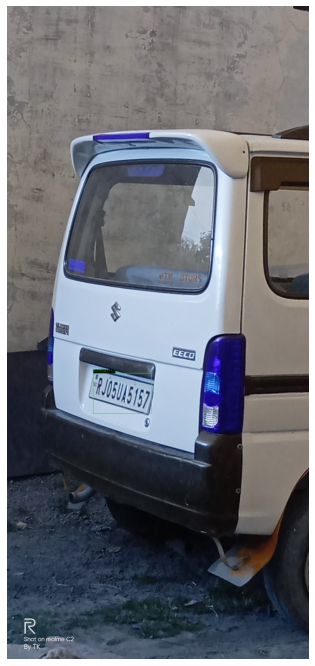

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.grid(False)
plt.imshow(frame)
plt.axis('off')

In [ ]:
vid_out = 'output.mp4'
vid_path = 'TEST.mp4'
print(f"[INFO] Working with video: {vid_path}")

## reading the video
cap = cv2.VideoCapture(vid_path)


if vid_out: ### creating the video writer if video output path is given

    # by default VideoCapture returns float instead of int
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    codec = cv2.VideoWriter_fourcc(*'mp4v') ##(*'XVID')
    out = cv2.VideoWriter(vid_out, codec, fps, (width, height))

# assert cap.isOpened()
frame_no = 1

while True:
    # start_time = time.time()
    ret, frame = cap.read()
    if ret  and frame_no %1 == 0:
        print(f"[INFO] Working with frame {frame_no} ")

        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        results = detectx(frame, model = model)
        frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)


        frame = plot_boxes(results, frame,classes = classes)
        
        if vid_out:
            print(f"[INFO] Saving output video. . . ")
            out.write(frame)

        frame_no += 1
        
    else: break

print(f"[INFO] Clening up. . . ")
### releaseing the writer
out.release()

[INFO] Working with video: TEST.mp4
[INFO] Working with frame 1 
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Saving output video. . . 
[INFO] Working with frame 2 
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Saving output video. . . 
[INFO] Working with frame 3 
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Saving output video. . . 
[INFO] Working with frame 4 
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Saving output video. . . 
[INFO] Working with frame 5 
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Saving output video. . . 
[INFO] Working with frame 6 
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Saving output video. . .